# Hotel Booking Demand - project Summary

**Goal**: Predict hotel booking cancellations to optimize revenue management

**Key Achievement**: 83.98% accuracy and 89.78% ROC-AUC using Random Forest

**Author**: Jiaming Liu

**Date**: October 2025

## 1. Business Problem

Hotel cancellations cost the industry billions annually. This project aims to:
- Predict which bookings are likely to be canceled
- Help hotels optimize overbooking strategies
- Reduce revenue loss from last-minute cancellations


## 2. Dataset Overview

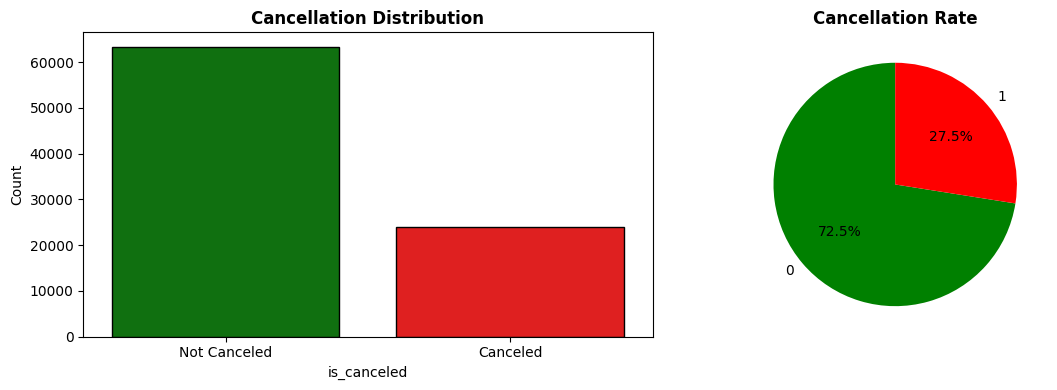

## 3. Key EDA Insights

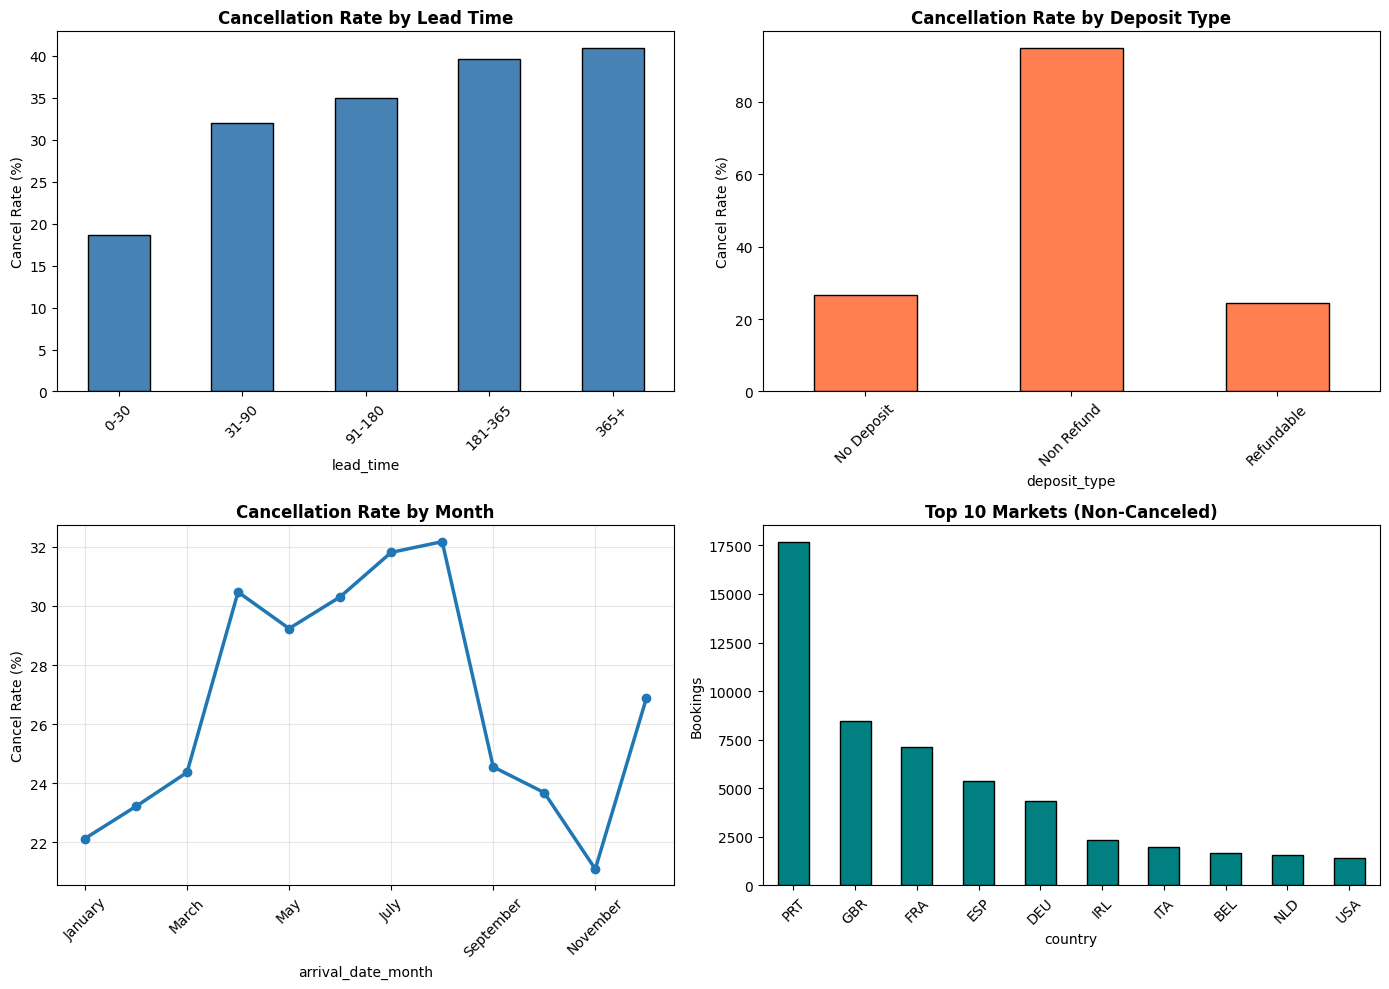

KEY FINDINGS:

- Lead Time: 19% cancel rate (0-30 days) → 41% (365+ days)
- Deposit Type: Deposit Type: Non-refund shows 90%+ cancellation rate (data quality issue: 
  likely payment failures, booking errors).
- Seasonality: August peak cancellations (32%), November lowest (21%)
- Top Markets: PRT, GBR, FRA drive most stable bookings

TAKEAWAY: Lead time + deposit type are primary levers for reducing cancellations


## 4. Feature Engineering

Transformed raw data into predictive features based on EDA insights:

| Feature | Description | Rationale |
|---------|-------------|-----------|
| `total_stay` | Weekend + weekday nights | Stay length affects cancellation probability |
| `stay_category` | Binned stay length (short/medium/mid-long/long) | Mid-long stays (15-30 nights) show high cancel risk |
| `has_prev_cancel` | Previous cancellation flag | Past behavior predicts future behavior |
| `has_prev_success` | Previous completed booking flag | Customer loyalty signal |
| `is_direct_booking` | Direct vs agent/OTA channel | Direct bookings 40% more stable |

**Final Feature Set**: 32 features ready for model training  

## 5. Model Development & Results

### 5.1 Algorithm Comparison

| Model | Accuracy | ROC-AUC | Notes |
|-------|----------|---------|-------|
| Logistic Regression | 79.76% | 84.25% | Baseline |
| Random Forest | 84.11% | 89.35% | Default params |
| **Random Forest (Tuned)** | **83.98%** | **89.78%** | HalvingRandomSearchCV |
| XGBoost | 83.91% | **89.93%** | Default params |
| LightGBM | 83.50% | 89.64% | Default params |

### 5.2 Model Selection

**Top Performers**: XGBoost (89.93%) and tuned Random Forest (89.78%) performed nearly identically, with only 0.15% difference in ROC-AUC.

**Winner: Random Forest** - Selected for deployment based on:
1. **Interpretability**: More transparent feature importance for business stakeholders
2. **Stability**: Less sensitive to hyperparameters (broader optimal region)
3. **Performance**: 89.78% ROC-AUC meets business requirements (>85% target)
4. **Simplicity**: Fewer hyperparameters to maintain in production

**Key Insight**: With proper feature engineering, both models achieve near-identical performance. Model selection came down to interpretability and operational considerations rather than pure accuracy.

### 5.3 Feature importance

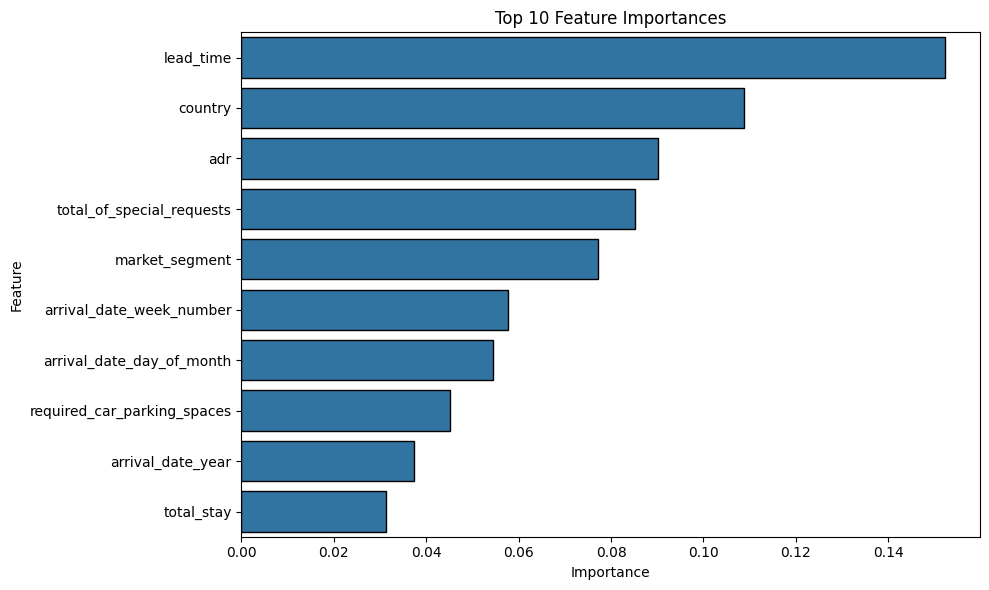

**Dominant Predictor:**  
Lead time accounts for 15% of model decisions - bookings made far in advance carry significantly higher cancellation risk.

**Top 3 = 35% of predictive power:**  
Lead time (15%) + Country (11%) + Price (9%) drive over one-third of all predictions.

**Feature Engineering Validated:**  
Our engineered feature `total_stay` ranks #10, confirming that combining weekend + weekday nights added value.

**Model-EDA Alignment:**  
Feature importance perfectly matches EDA insights:
- Lead time dominated in exploratory analysis → #1 in model
- Geographic patterns identified → #2 Country


## 6. Conclusion

### Summary

Built a hotel cancellation prediction model achieving **83.98% accuracy and 89.78% ROC-AUC** using Random Forest. Lead time,  country emerged as top predictors, validating EDA insights.

### Business Recommendations

**1. Payment System & Booking Flow Investigation**
- CRITICAL: Investigate 99% "Non Refund" cancellation anomaly
- Root causes to examine:
    - Payment processing failures (card declines, fraud detection)
    - Booking system issues (unclear refund policies, confusing flow)
    - Data labeling errors (failed payments vs actual bookings?)
- Fix payment infrastructure before implementing deposit policies

**2. Geographic Market Strategy**
- Focus marketing on stable markets: Portugal, UK, France
- Implement stricter policies for historically unstable markets
- Personalized retention campaigns by country

**3. Dynamic Pricing & Overbooking**
- Adjust pricing based on cancellation probability
- Safe overbooking (5-10%) for high-risk date ranges
- Real-time risk scoring at booking time

**4. Seasonal Adjustments**
- Heightened monitoring during high-risk months (January, August)
- Flexible cancellation policies during stable periods (November)
- Targeted promotions to fill predicted cancellation gaps

### Key Learning

Feature engineering > hyperparameter tuning. Understanding the business problem and creating quality features delivered stronger results than model complexity.

### Next Steps

- Deploy model as REST API for real-time scoring
- Integrate with booking system for automatic risk flagging
- Build monitoring dashboard for model performance and data drift